In [2]:
#importing modules.
import pandas as pd
from sklearn.tree import DecisionTreeClassifier as dt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter

#printing the dataset
df=pd.read_csv('pulsar.csv')
df

,140.5625,55.68378214,-0.234571412,-0.699648398,3.199832776,19.11042633,7.975531794,74.24222492,0
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
...,...,...,...,...,...,...,...,...,...
17892,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17893,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17894,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17895,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [3]:
#renaming the columns

column_mapping={'140.5625': 'mean_integrated_profile',
                '55.68378214': 'std_dev_integrated_profile',
                '-0.234571412': 'ex_kurtosis_integrated_profile',
                '-0.699648398' : 'skew_integrated_profile',
                '3.199832776' : 'mean_dm_snr',
                '19.11042633' : 'std_dev_dm_snr',
                '7.975531794' : 'ex_kurtosis_dm_snr',
                '74.24222492' : 'skew_dm_snr',
                '0': 'class'
                }

df.rename(columns=column_mapping,inplace=True)
print(df)



       mean_integrated_profile  std_dev_integrated_profile  \
0                   102.507812                   58.882430   
1                   103.015625                   39.341649   
2                   136.750000                   57.178449   
3                    88.726562                   40.672225   
4                    93.570312                   46.698114   
...                        ...                         ...   
17892               136.429688                   59.847421   
17893               122.554688                   49.485605   
17894               119.335938                   59.935939   
17895               114.507812                   53.902400   
17896                57.062500                   85.797340   

       ex_kurtosis_integrated_profile  skew_integrated_profile  mean_dm_snr  \
0                            0.465318                -0.515088     1.677258   
1                            0.323328                 1.051164     3.121237   
2                 

In [4]:
# extracting info from data
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17897 entries, 0 to 17896
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   mean_integrated_profile         17897 non-null  float64
 1   std_dev_integrated_profile      17897 non-null  float64
 2   ex_kurtosis_integrated_profile  17897 non-null  float64
 3   skew_integrated_profile         17897 non-null  float64
 4   mean_dm_snr                     17897 non-null  float64
 5   std_dev_dm_snr                  17897 non-null  float64
 6   ex_kurtosis_dm_snr              17897 non-null  float64
 7   skew_dm_snr                     17897 non-null  float64
 8   class                           17897 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB
None


,mean_integrated_profile,std_dev_integrated_profile,ex_kurtosis_integrated_profile,skew_integrated_profile,mean_dm_snr,std_dev_dm_snr,ex_kurtosis_dm_snr,skew_dm_snr,class
count,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.00000
mean,111.078321,46.549021,0.477897,1.770417,12.614926,26.326918,8.303574,104.859419,0.09158
std,25.652705,6.843040,1.064056,6.168058,29.473637,19.471042,4.506217,106.517270,0.28844
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.00000
25%,100.929688,42.375426,0.027108,-0.188528,1.923077,14.437330,5.781485,34.957119,0.00000
50%,115.078125,46.946435,0.223241,0.198736,2.801839,18.459977,8.433872,83.068996,0.00000
75%,127.085938,51.022887,0.473349,0.928206,5.464883,28.428152,10.702973,139.310905,0.00000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.00000


In [5]:
#dropping the column "class" for independent variables
X = df.drop('class',axis=1)
y = df['class']
print(df)


       mean_integrated_profile  std_dev_integrated_profile  \
0                   102.507812                   58.882430   
1                   103.015625                   39.341649   
2                   136.750000                   57.178449   
3                    88.726562                   40.672225   
4                    93.570312                   46.698114   
...                        ...                         ...   
17892               136.429688                   59.847421   
17893               122.554688                   49.485605   
17894               119.335938                   59.935939   
17895               114.507812                   53.902400   
17896                57.062500                   85.797340   

       ex_kurtosis_integrated_profile  skew_integrated_profile  mean_dm_snr  \
0                            0.465318                -0.515088     1.677258   
1                            0.323328                 1.051164     3.121237   
2                 

In [6]:
# Splitting data for training and evaluation
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=22)

# model training and evaluation
forest = rfc()
forest = forest.fit(X_train,y_train)
y_pred = forest.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f'accuracy score {accuracy}')
print(classification_report(y_test,y_pred))


accuracy score 0.9780260707635009
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4837
           1       0.92      0.85      0.88       533

    accuracy                           0.98      5370
   macro avg       0.95      0.92      0.94      5370
weighted avg       0.98      0.98      0.98      5370



Counter({0: 16258, 1: 1639})


<Axes: xlabel='mean_integrated_profile', ylabel='std_dev_integrated_profile'>

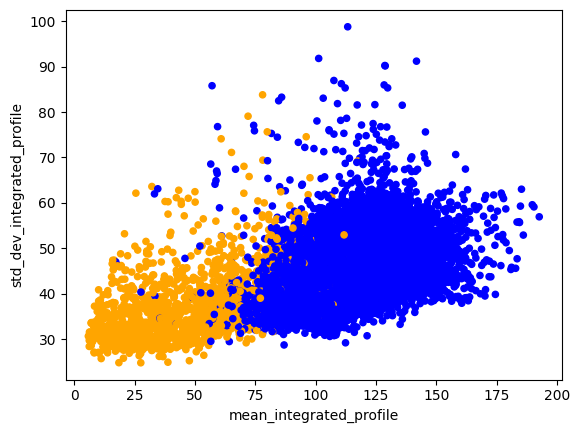

In [7]:
# As the support for the classes are highly imbalanced we are going to take a look at the balance in the classes
print(Counter(df['class']))
# plotting the points to assess the balance 
colormap = np.array(["blue","orange"])
df.plot.scatter(x='mean_integrated_profile', y='std_dev_integrated_profile',c=colormap[df['class']])
# Here we can see that the class imbalance is heavy so we are going to perform oversampling to bring the balance 

In [8]:
#creating the standard scaler and smote objects
scaler = StandardScaler()
smote = SMOTE(random_state=22)

#fitting on data
scaledX = scaler.fit_transform(X)
resampledX, resampledy = smote.fit_resample(scaledX,y)

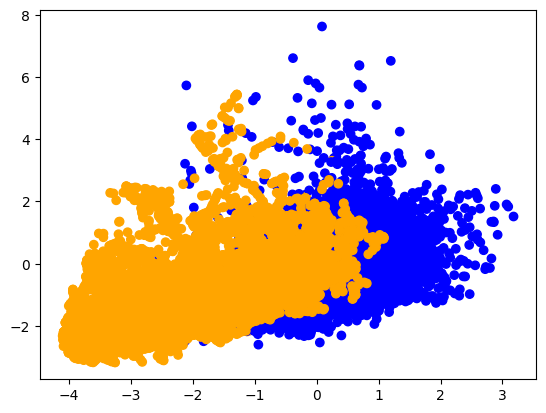

In [17]:
# visualising the resampled data 
resampled_df = pd.DataFrame(resampledX,columns= X.columns)
colormap = np.array(["blue","orange"])
plt.scatter(resampled_df['mean_integrated_profile'], resampled_df['std_dev_integrated_profile'],c=colormap[resampledy])
plt.show()

In [ ]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(resampledX,resampledy,test_size=0.3,random_state=22)

#creating the model
forest = rfc()
#training the model
forest = forest.fit(X_train,y_train)

#testing the accuracy of the model
y_pred = forest.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)
print(classification_report(y_test,y_pred))

In [ ]:
'''
scaler = StandardScaler()
smote = SMOTE(random_state=22)

re_X, re_y = smote.fit_resample(X,y)
sc_X = scaler.fit_transform(re_X)

X_train, X_test, y_train, y_test = train_test_split(sc_X,re_y,test_size=0.3,random_state=22)
forest = rfc()
forest = forest.fit(X_train,y_train)
y_pred = forest.predict(X_test)
accuracyforest = accuracy_score(y_test,y_pred)
print(accuracyforest)
print(classification_report(y_test,y_pred))
'''

In [ ]:
'''
svc = SVC()
svc = svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print("accuracy : ", accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
'''

In [ ]:
'''
dtree = dt()
dtree = dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)
print("accuracy : ", accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
'''